<a href="https://colab.research.google.com/github/Racsaanth05/ml/blob/main/ML_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train MSE: 1175567.6099351083 Train RMSE: 1084.2359567617689 Train MAPE: 0.873745244807516 Train R2: 3.3704954554014677e-06
Test MSE: 1211376.3899641475 Test RMSE: 1100.6254539870263 Test MAPE: 0.9268249056031965 Test R2: -0.0016576902586302733
Silhouette Score: 0.3255752003407831
Calinski-Harabasz Score: 463.50549156937745
Davies-Bouldin Index: 1.2415516810279779


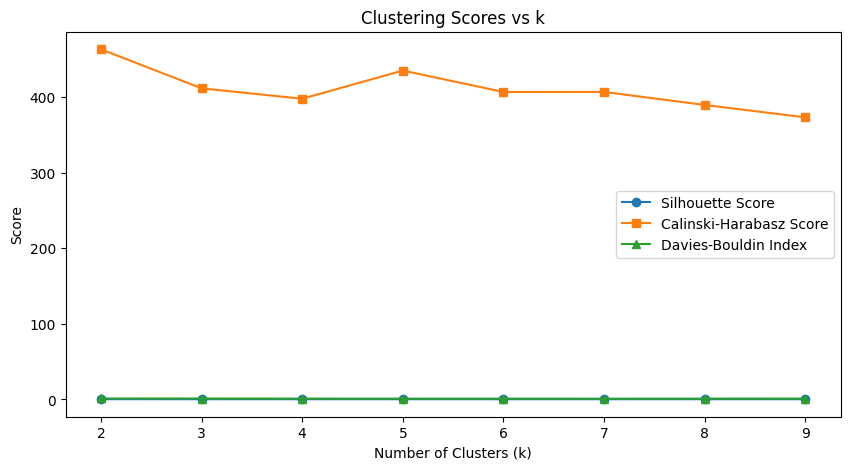

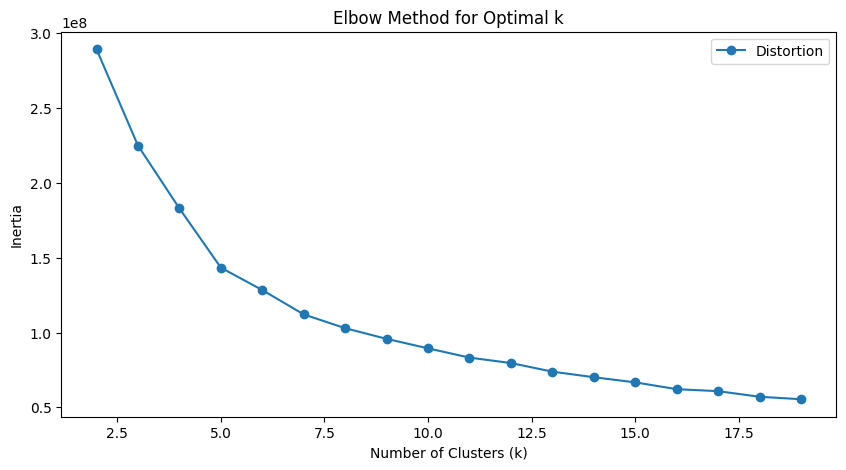

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("lab3(dataset).csv")
X = df.drop(columns=["id", "ram"])
y = df["ram"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A1: Train a Linear Regression Model
reg = LinearRegression().fit(X_train.iloc[:, 0].values.reshape(-1, 1), y_train)
y_train_pred = reg.predict(X_train.iloc[:, 0].values.reshape(-1, 1))
y_test_pred = reg.predict(X_test.iloc[:, 0].values.reshape(-1, 1))

# A2: Calculate MSE, RMSE, MAPE, and R2 Scores
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", mse_train, "Train RMSE:", rmse_train, "Train MAPE:", mape_train, "Train R2:", r2_train)
print("Test MSE:", mse_test, "Test RMSE:", rmse_test, "Test MAPE:", mape_test, "Test R2:", r2_test)

# A3: Train model with all attributes
reg_all = LinearRegression().fit(X_train, y_train)
y_train_pred_all = reg_all.predict(X_train)
y_test_pred_all = reg_all.predict(X_test)

# A4: Perform k-means clustering (ignoring target variable)
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X_train)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# A5: Calculate clustering scores
silhouette = silhouette_score(X_train, kmeans_labels)
ch_score = calinski_harabasz_score(X_train, kmeans_labels)
db_index = davies_bouldin_score(X_train, kmeans_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)

# A6: Perform k-means clustering for different values of k and evaluate scores
k_values = range(2, 10)
silhouette_scores = []
ch_scores = []
db_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))
    db_indices.append(davies_bouldin_score(X_train, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, ch_scores, marker='s', label='Calinski-Harabasz Score')
plt.plot(k_values, db_indices, marker='^', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.title('Clustering Scores vs k')
plt.show()

# A7: Elbow Plot to determine optimal k
distortions = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_values, distortions, marker='o', label='Distortion')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()
